# MSA 2024 Phase 2 - Part 1

In [45]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline



## 1. Find all variables and understand them
Row ID: Identifier for the row.
Order ID: Identifier for the order.
Order Date: Date when the order was placed.
Ship Date: Date when the order was shipped.
Ship Mode: Shipping mode (e.g., Second Class, Standard Class).
Customer ID: Identifier for the customer.
Customer Name: Name of the customer.
Segment: Market segment of the customer (e.g., Consumer, Corporate).
Country: Country of the customer.
City: City of the transaction.
State: State of the transaction.
Postal Code: Postal code of the transaction location.
Region: Region of the transaction (e.g., South, West).
Product ID: Identifier for the product.
Category: Category of the product (e.g., Furniture).
Sub-Category: Sub-category of the product (e.g., Chairs, Tables).
Product Name: Name of the product.
Sales: Total sales amount.
Quantity: Quantity of items.
Discount: Discount applied.
Profit: Profit from the transaction.

In [46]:
dataset = pd.read_csv(r'store_sales.csv', encoding='ISO-8859-1',index_col=False, sep=",", header=0)
print(dataset.head(10))

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
3       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
4      11  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
5      24  US-2017-156909   7/16/2017   7/18/2017    Second Class    SF-20065   
6      25  CA-2015-106320   9/25/2015   9/30/2015  Standard Class    EB-13870   
7      28  US-2015-150630   9/17/2015   9/21/2015  Standard Class    TB-21520   
8      30  US-2015-150630   9/17/2015   9/21/2015  Standard Class    TB-21520   
9      37  CA-2016-117590   12/8/2016  12/10/2016     First Class    GH-14485   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United 

## 2. Clean data

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
3       6  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
4      11  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
5      24  US-2017-156909 2017-07-16 2017-07-18    Second Class    SF-20065   
6      25  CA-2015-106320 2015-09-25 2015-09-30  Standard Class    EB-13870   
7      28  US-2015-150630 2015-09-17 2015-09-21  Standard Class    TB-21520   
8      30  US-2015-150630 2015-09-17 2015-09-21  Standard Class    TB-21520   
9      37  CA-2016-117590 2016-12-08 2016-12-10     First Class    GH-14485   

     Customer Name    Segment  Country  City  ...     Profit  Order Year  \
0      Claire Gute   Consumer        0   137  ...    4

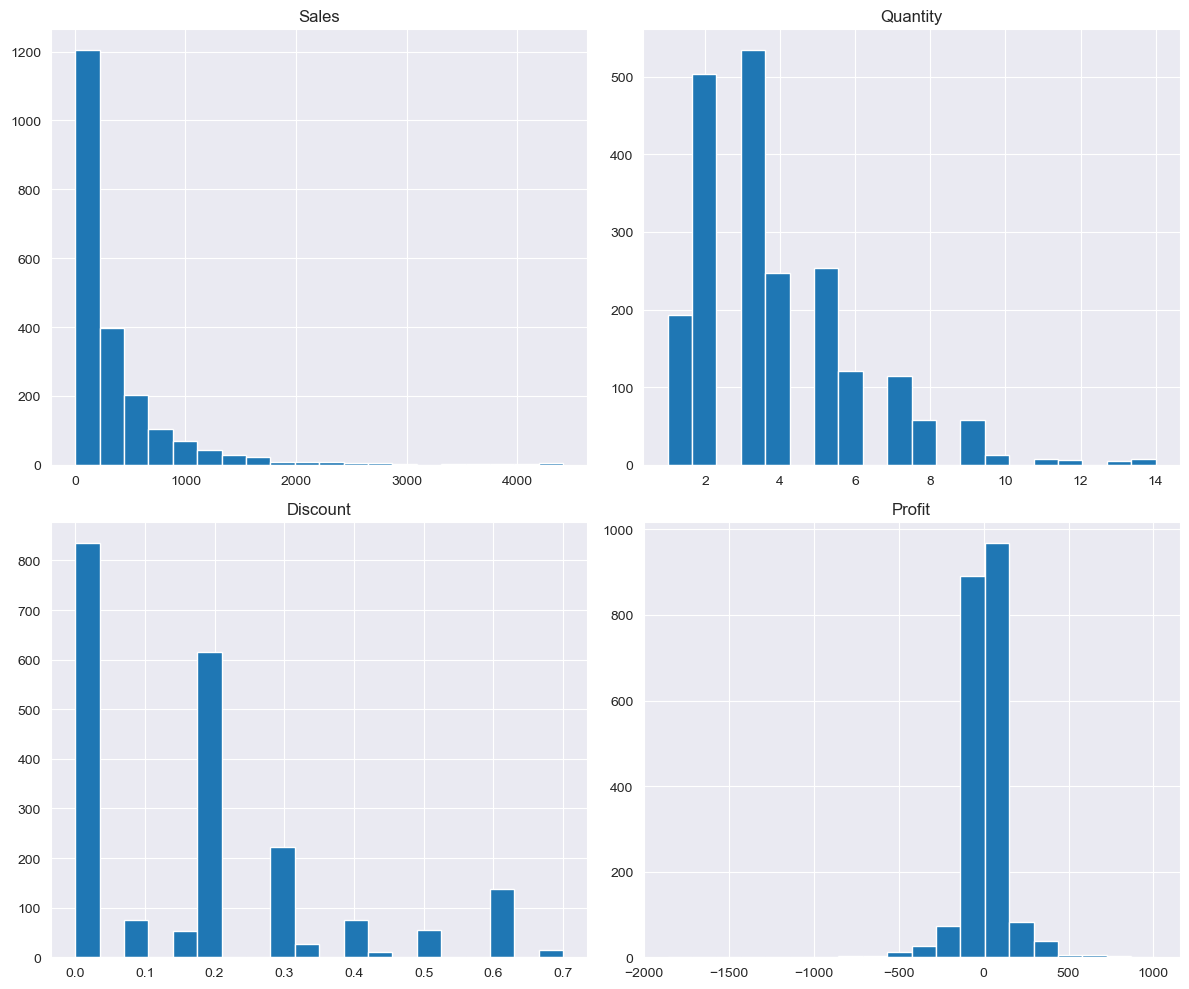

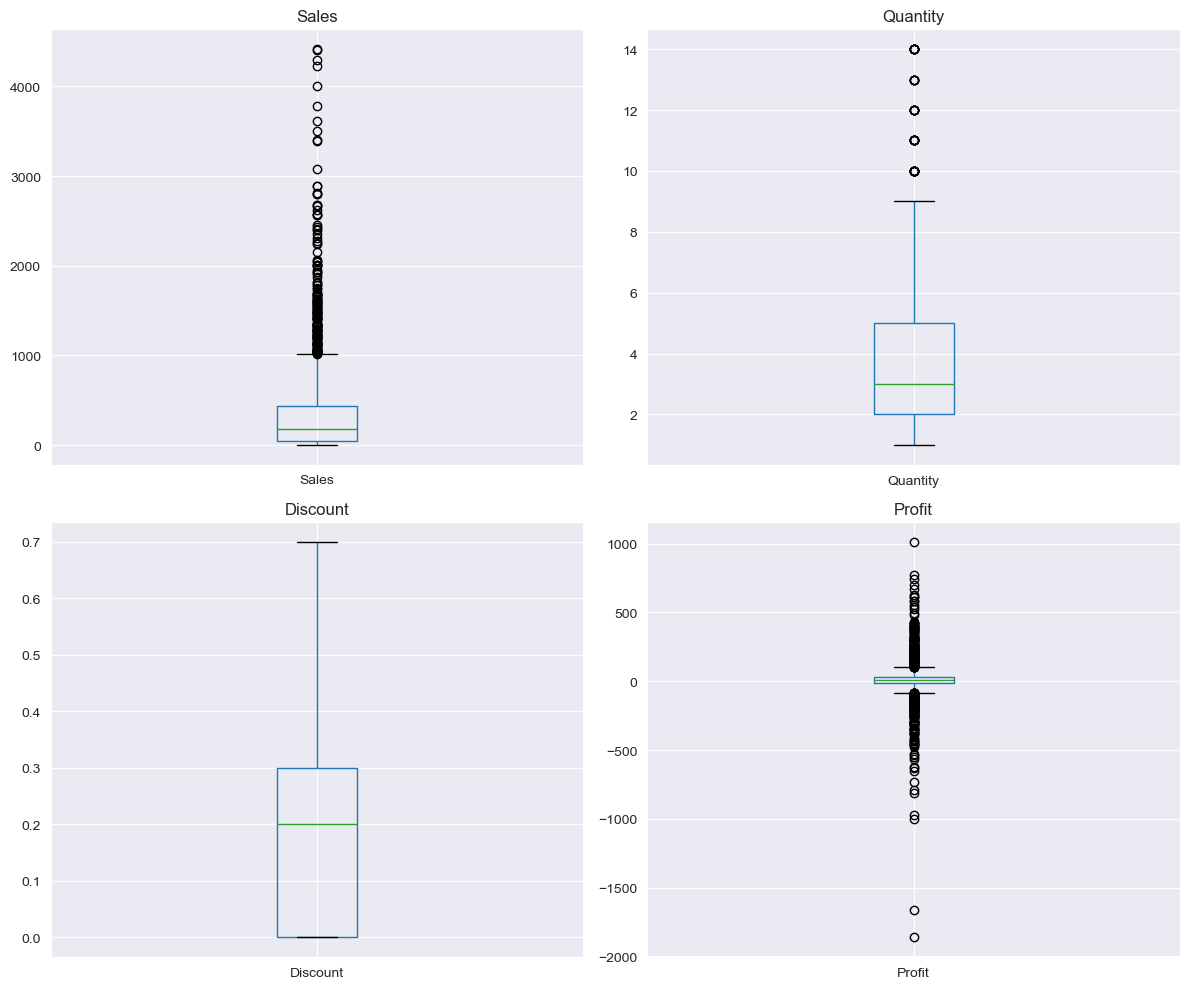

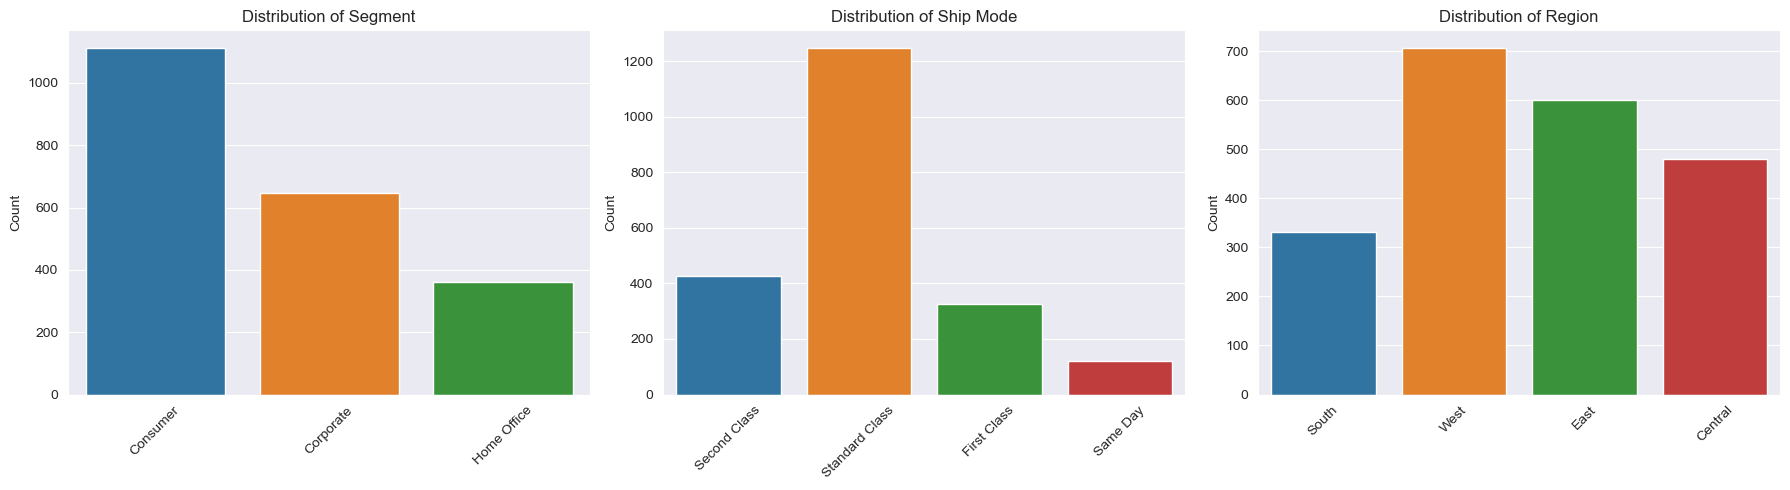

Series([], dtype: int64)


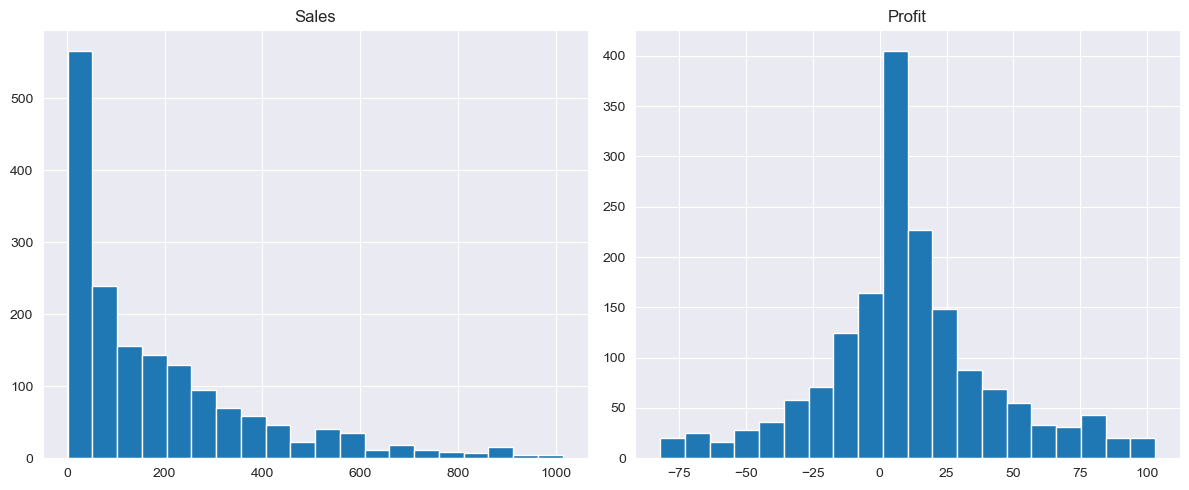

In [47]:
#transfer date data into numerical data
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'])
dataset['Ship Date'] = pd.to_datetime(dataset['Ship Date'])

dataset['Order Year'] = dataset['Order Date'].dt.year
dataset['Order Month'] = dataset['Order Date'].dt.month
dataset['Order Day'] = dataset['Order Date'].dt.day
dataset['Order Weekday'] = dataset['Order Date'].dt.weekday

dataset['Ship Year'] = dataset['Ship Date'].dt.year
dataset['Ship Month'] = dataset['Ship Date'].dt.month
dataset['Ship Day'] = dataset['Ship Date'].dt.day
dataset['Ship Weekday'] = dataset['Ship Date'].dt.weekday
dataset['Processing Time'] = (dataset['Ship Date'] - dataset['Order Date']).dt.days
#label non-categorical data
label_encoder = LabelEncoder()
dataset['Country'] = label_encoder.fit_transform(dataset['Country'])
dataset['City'] = label_encoder.fit_transform(dataset['City'])
dataset['State'] = label_encoder.fit_transform(dataset['State'])
dataset['Sub-Category'] = label_encoder.fit_transform(dataset['Sub-Category'])
print(dataset.head(10))
# Histograms for numerical columns
dataset[['Sales', 'Quantity', 'Discount', 'Profit']].hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()
# Box plots to identify outliers
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
num_columns = ['Sales', 'Quantity', 'Discount', 'Profit']
for i, ax in enumerate(axs.flatten()):
    dataset.boxplot(column=num_columns[i], ax=ax)
    ax.set_title(num_columns[i])
plt.tight_layout()
plt.show()
#statistical measures for numerical columns:
#Sales: Mean sales are approximately $349.83, with a wide range due to significant outliers, as indicated by a maximum value of $4416.17.
#Quantity: On average, each transaction involves about 3.79 items, with a maximum of 14 items in a transaction.
#Discount: Discounts range from 0% to 70%, with an average discount of about 17.4%.
#Profit: Mean profit is approximately $8.70, but the profit range is extensive, from -$1862.31 to $1013.13, suggesting some transactions are highly profitable while others incur substantial losses.
dataset.describe()

# Columns to check for imbalance
categorical_columns = ['Segment', 'Ship Mode', 'Region']

# Plot the distribution of these categorical variables to identify imbalances
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=dataset, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Convert non-numerical columns to numerical formats using one-hot encoding
data_encoded = pd.get_dummies(dataset, columns=['Ship Mode', 'Segment', 'Region', 'Category'])
missing_values = data_encoded.isnull().sum()

# Identify any missing values across the dataset
print(missing_values[missing_values > 0])
# Handling outliers using the IQR method for 'Sales' and 'Profit'
Q1_sales = data_encoded['Sales'].quantile(0.25)
Q3_sales = data_encoded['Sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales

Q1_profit = data_encoded['Profit'].quantile(0.25)
Q3_profit = data_encoded['Profit'].quantile(0.75)
IQR_profit = Q3_profit - Q1_profit

# Define limits for outliers
lower_limit_sales = Q1_sales - 1.5 * IQR_sales
upper_limit_sales = Q3_sales + 1.5 * IQR_sales
lower_limit_profit = Q1_profit - 1.5 * IQR_profit
upper_limit_profit = Q3_profit + 1.5 * IQR_profit

# Apply limits to filter out outliers
filtered_data = data_encoded[(data_encoded['Sales'] >= lower_limit_sales) &
                             (data_encoded['Sales'] <= upper_limit_sales) &
                             (data_encoded['Profit'] >= lower_limit_profit) &
                             (data_encoded['Profit'] <= upper_limit_profit)]

# Visualize the data after outlier handling
filtered_data[['Sales', 'Profit']].hist(bins=20, figsize=(12, 5))
plt.tight_layout()
plt.show()




## 3. Visualise data

C:\Users\95440\AppData\Local\Temp\ipykernel_68184\329196167.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = filtered_data.corr()


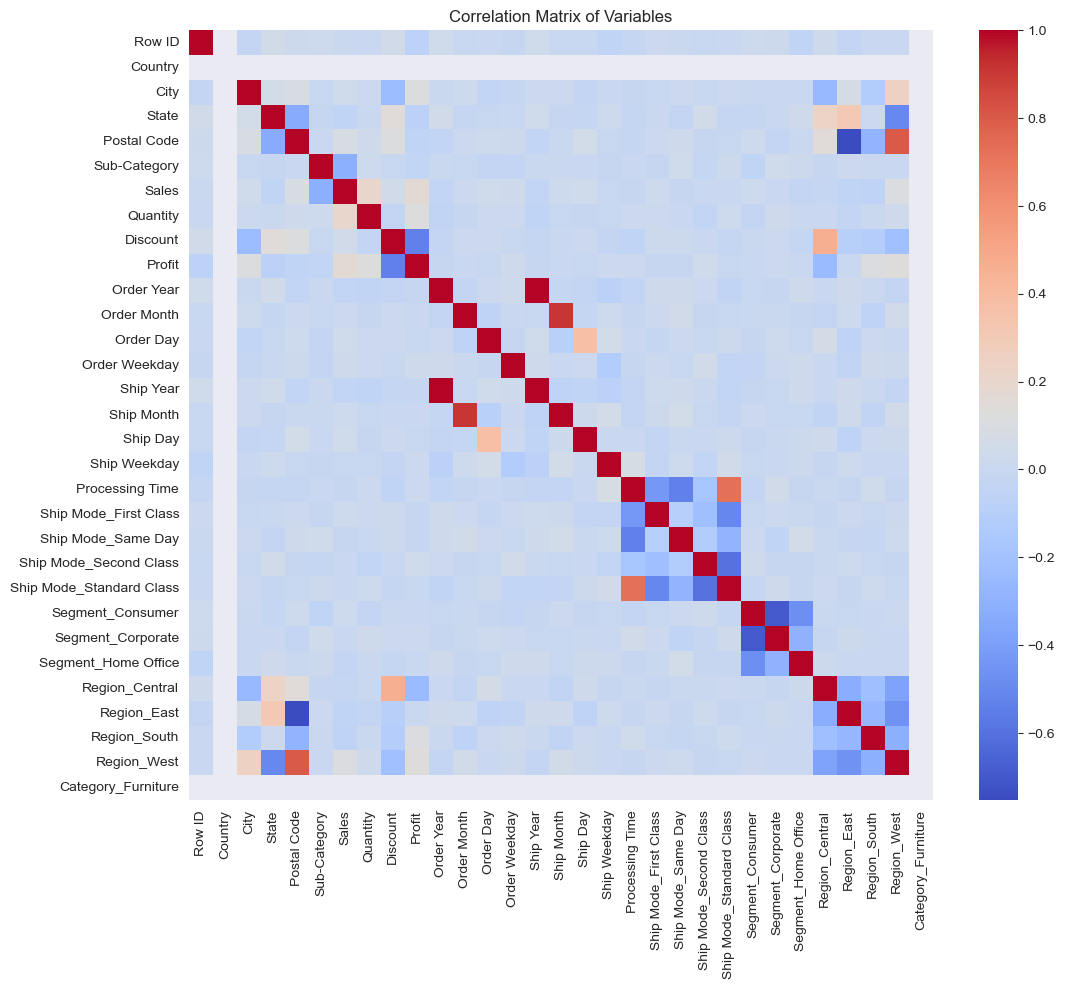

['City', 'State', 'Postal Code', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year', 'Order Month', 'Order Day', 'Order Weekday', 'Ship Year', 'Ship Month', 'Ship Day', 'Ship Weekday', 'Processing Time', 'Ship Mode_First Class', 'Ship Mode_Same Day', 'Segment_Consumer', 'Segment_Home Office', 'Region_Central', 'Region_East', 'Region_South', 'Region_West']


In [50]:
# Calculate the correlation matrix
correlation_matrix = filtered_data.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix of Variables')
plt.show()

# Select features based on correlation threshold
threshold = 0
strong_correlation = correlation_matrix['Sales'].apply(lambda x: abs(x) > threshold)
selected_features = strong_correlation[strong_correlation].index.tolist()
print(selected_features)

preprocessed_data = filtered_data.drop(['Row ID', 'Order ID', 'Customer ID', 'Product ID', 'Order Date', 'Ship Date','Customer Name', 'Product Name'], axis=1)
preprocessed_data.to_csv('preprocessed_store_sales.csv',index=False)

## 4. Identify correlated variables
Certain pairs of features related to the one-hot encoded variables (like those derived from Ship Mode, Segment, etc.) show expected correlations as they are mutually exclusive.
The numerical features Sales, Quantity, Discount, and Profit show varying degrees of correlation, indicating how these elements interplay in business transactions. Notably:
Profit and Sales typically show a positive correlation, implying higher sales usually lead to higher profits, but this relationship can be moderated by discounts and other factors.
Discount shows a negative correlation with Profit, suggesting that higher discounts might lead to lower profits in transactions.

## 5. Summary
Here are the steps taken to perform exploratory data analysis (EDA) and preprocessing:

Data Understanding and Visualization: Identified and visualized numerical and categorical data, revealing key distributions and outlier presence.
Data Conversion: Transformed categorical data into numerical formats using one-hot encoding to facilitate machine learning modeling.
Outlier Management: Identified and removed outliers in Sales and Profit to normalize their distributions.
Correlation Analysis: Analyzed correlations to understand dependencies between variables, which is crucial for feature selection and modeling.

Findings:
The significant impact of discounts on profits and their negative correlation highlights an area for strategic business analysis.
Outlier management helped in stabilizing feature scales, making the dataset more uniform and potentially improving model performance.